![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [65]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE

In [66]:
#Finding Nulls
print(penguins_df.head())
print(penguins_df.info())
print(penguins_df.isnull().sum())

#dropping NaNs
penguins_df = penguins_df.dropna()

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
culmen_length_mm     0
culmen_depth_mm  

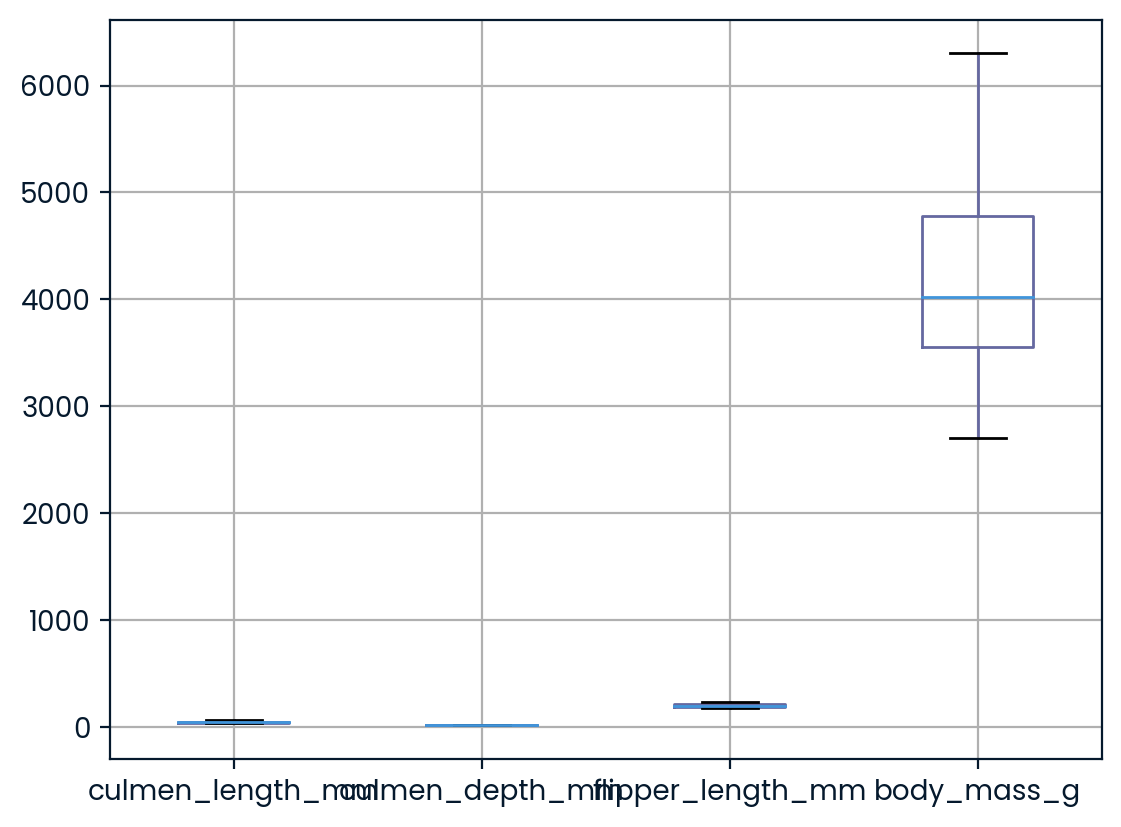

In [67]:
#Finding Outliers
penguins_df.boxplot()
plt.show()

#there are two outliers on flipper length, one which is below 0mm and another is that is over 5000mm.

Empty DataFrame
Columns: [culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: [] Empty DataFrame
Columns: [culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


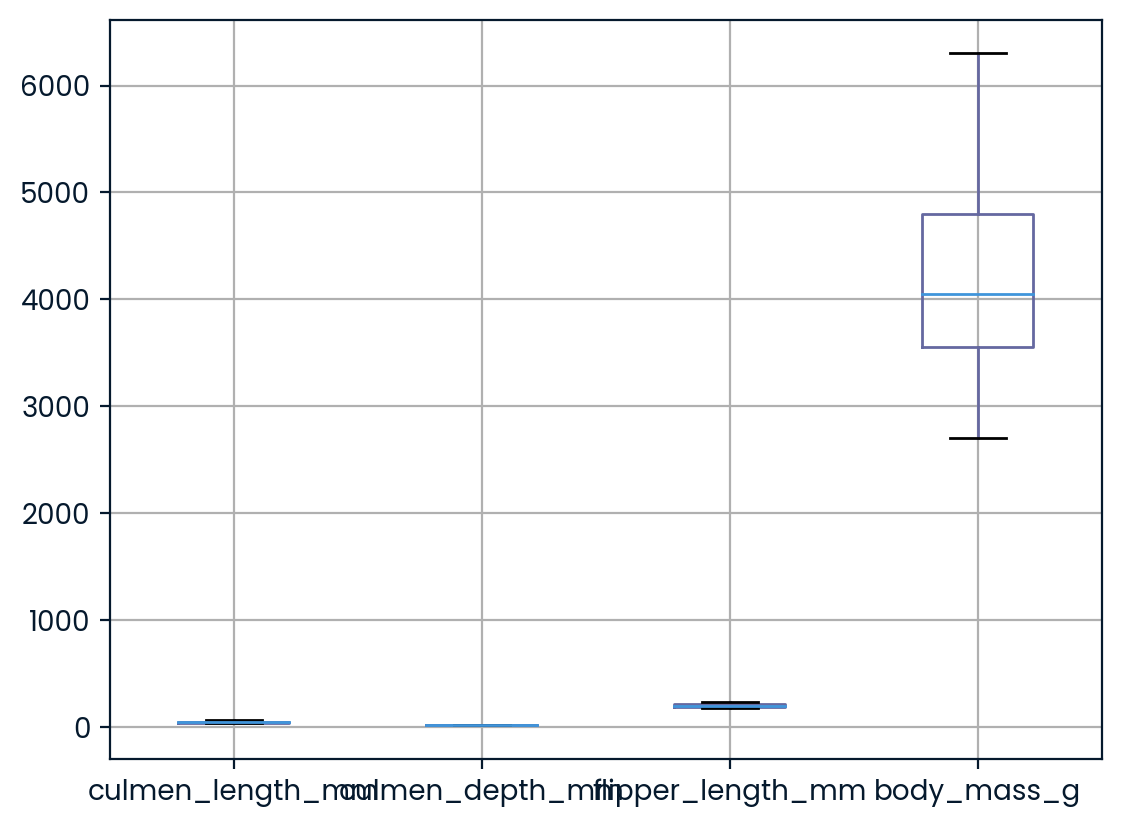

In [68]:
#Removing Outliers
print(penguins_df[penguins_df['flipper_length_mm']>4000],
penguins_df[penguins_df['flipper_length_mm']<0])

penguins_clean = penguins_df.drop([9,14])
penguins_clean.boxplot()
plt.show()

In [69]:
#Create dummy variables

# Create dummy variables and drop the first level of each categorical variable
df = pd.get_dummies(penguins_clean, drop_first=True)

# Display the first few rows of the DataFrame
print(df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0         1
1              39.5             17.4              186.0       3800.0         0
2              40.3             18.0              195.0       3250.0         0
3              36.7             19.3              193.0       3450.0         0
4              39.3             20.6              190.0       3650.0         1


In [70]:
#Pre-Processing data for PCA

scaler = StandardScaler()

X = scaler.fit_transform(df)

penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0         -0.913137         0.791287          -1.441267    -0.571376  0.987951
1         -0.839533         0.128663          -1.082851    -0.509332 -1.012196
2         -0.692325         0.434490          -0.437702    -1.191825 -1.012196
3         -1.354762         1.097114          -0.581068    -0.943645 -1.012196
4         -0.876335         1.759738          -0.796118    -0.695466  0.987951
5         -0.949939         0.332548          -1.441267    -0.726489 -1.012196
6         -0.894736         1.250027          -0.437702     0.576453  0.987951
7         -0.545117         0.230606          -1.369584    -1.253870 -1.012196
8         -1.005142         2.065564          -0.724435    -0.509332  0.987951
9         -0.986741         0.944201          -0.437702    -0.943645 -1.012196

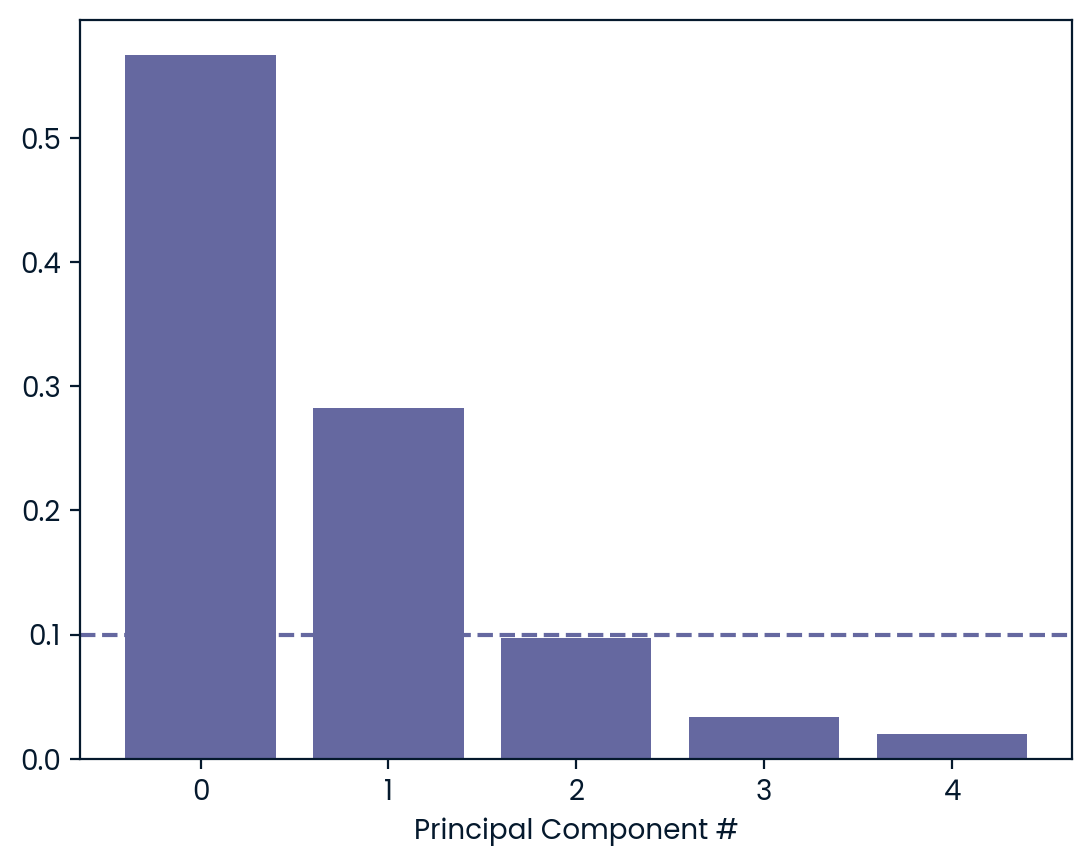

In [71]:
#Performing PCA
%matplotlib inLine

pca= PCA()
pca.fit(penguins_preprocessed)
exp_variance = pca.explained_variance_ratio_

#plotting explained variance

fig,ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.axhline(y=0.1, linestyle='--')

In [72]:
#Graph shows only features 0 and 1 are above 10%
#Running PCA with only these features

n_components = 2

pca = PCA(n_components=n_components, random_state=42)

penguins_PCA = pca.fit_transform(penguins_preprocessed)

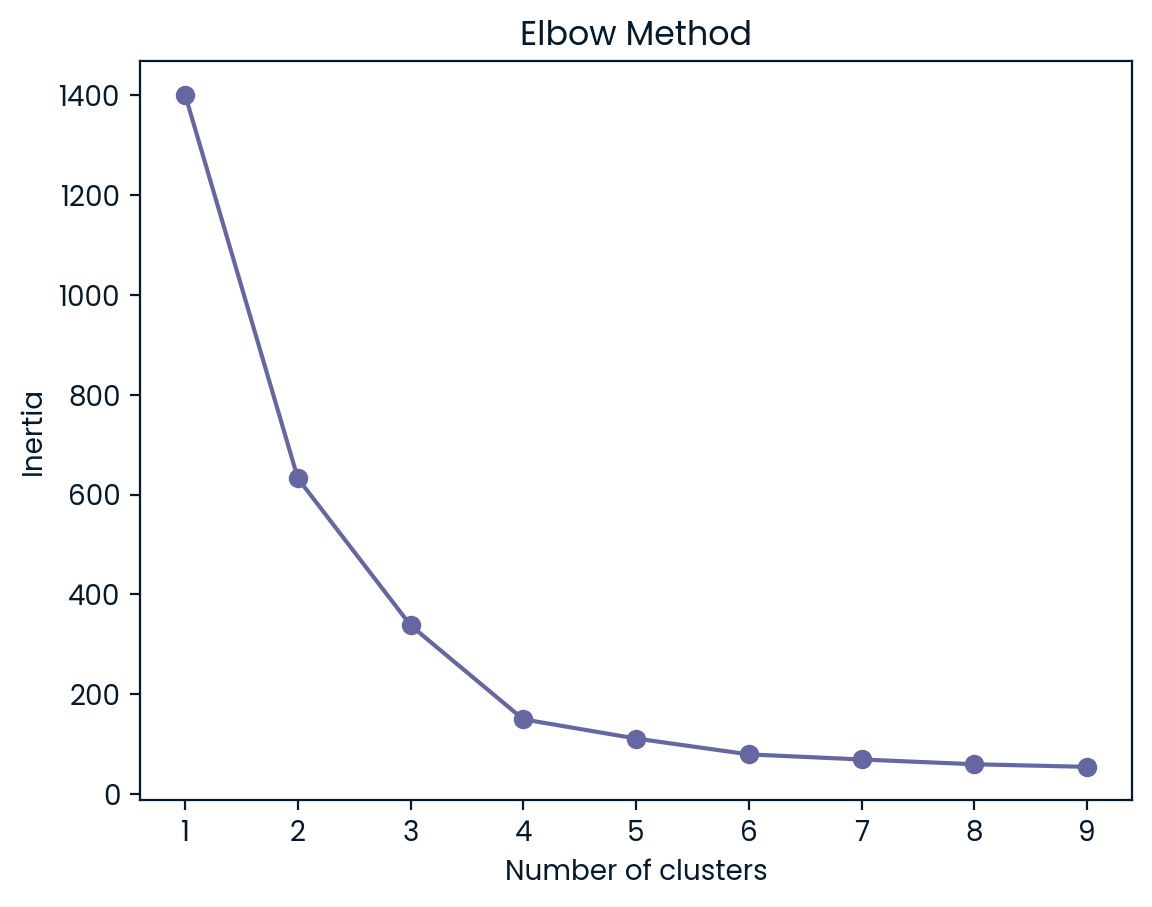

In [73]:
#Finding optimum number of clusters

inertia = []

for k in range(1,10):
    kmeans= KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

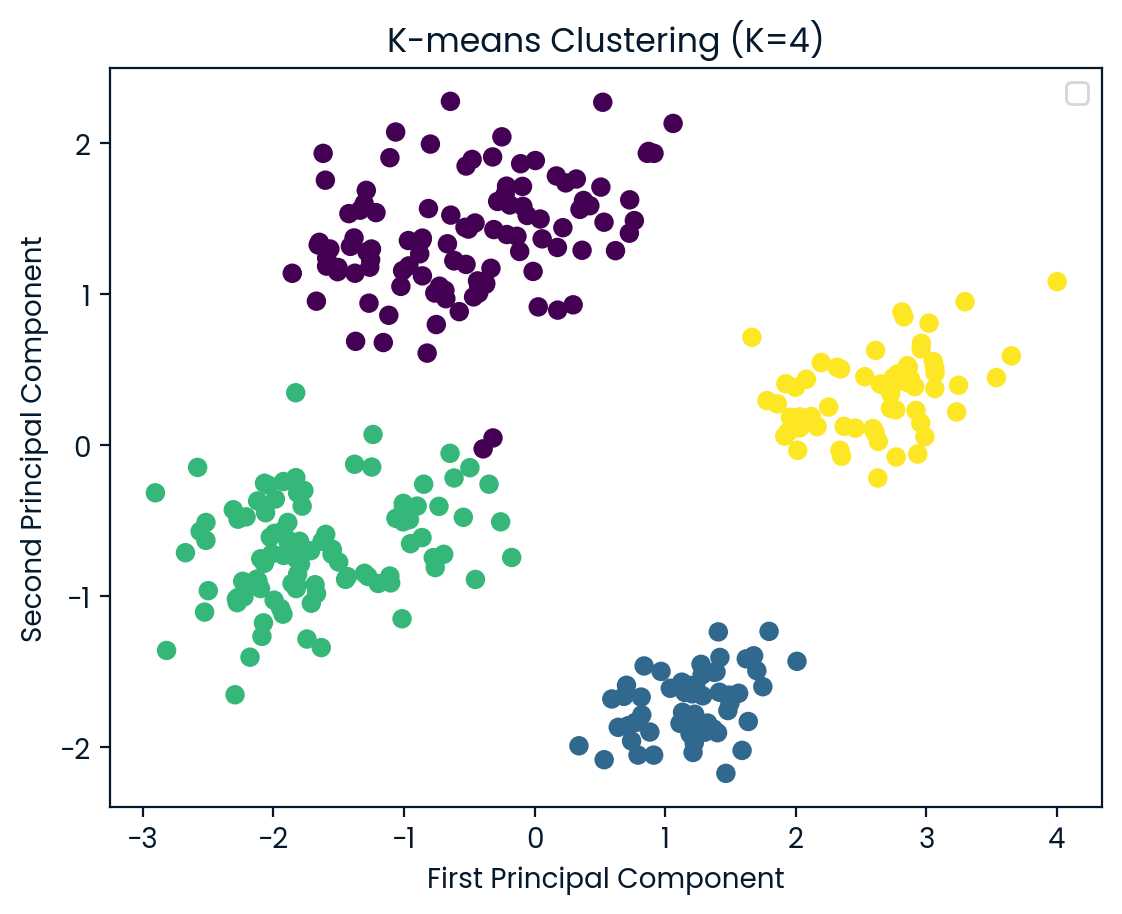

In [74]:
#Running KMeans cluster algorithm
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [75]:
#Creating a dataframe for each cluster

penguins_clean['label']= kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                  'label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()

stat_penguins

culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             44.067593        19.095370         194.666667
1             45.563793        14.237931         212.706897
2             40.006796        17.590291         189.223301
3             49.473770        15.718033         221.540984